In [1]:
pip install jupyter transformers torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
pip install torch transformers scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


LOAD PACKAGES, CLASSIFIER AND TOKENIZER MODELS

In [5]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Load your fine-tuned model and tokenizer
model_directory = 'E:\\studies\\USJ FOT\\lecture\\Research\\CodeBase\\Sentiment Model\\sentiment_v1'
tokenizer_directory = 'E:\\studies\\USJ FOT\\lecture\\Research\\CodeBase\\Sentiment Model\\sentiment_v1_tokenizer' 
tokenizer = RobertaTokenizer.from_pretrained(tokenizer_directory)
model = RobertaForSequenceClassification.from_pretrained(model_directory)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at E:\studies\USJ FOT\lecture\Research\CodeBase\Sentiment Model\sentiment_v1 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predict function

In [3]:
# Function to encode the texts and predict the labels
def predict(texts):
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1).numpy()
    return predictions

In [7]:
# Load dataset
df = pd.read_csv('E:\\studies\\USJ FOT\\lecture\\Research\\CodeBase\\Sentiment Model\\data.csv')  # Replace with your dataset path

# Map sentiment labels to integers
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['Sentiment'] = df['Sentiment'].map(label_mapping)

# Split dataset into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Extract texts and true labels from the test set
texts = test_df['Sentence'].tolist()
true_labels = test_df['Sentiment'].tolist()

# Predict the labels for the test set
predicted_labels = predict(texts)



Predict the whole csv file


model = AutoModelForSequenceClassification.from_pretrained(model_directory)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_directory)

def predict(text):
    # Ensure text is a string
    if pd.isna(text):
        return "No Text"  # Handle NaN values by returning a default label or similar indication
    text = str(text)  # Convert text to string in case it's not

    # Encode the input text, truncate if longer than 512 tokens
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True)
    
    # Get logits from the model
    with torch.no_grad():
        output = model(**inputs)
        logits = output.logits
    
    # Apply softmax to convert logits to probabilities
    probabilities = torch.softmax(logits, dim=-1)
    
    # Labels corresponding to the order of model outputs
    labels = ['Inflation', 'International Trade', 'GDP Growth', 'Exchange Rates', 'Monetary Policy', 'Fiscal Policy', 'Unemployment']
    
    # Find the highest probability and its corresponding label
    prediction_idx = torch.argmax(probabilities)
    prediction_label = labels[prediction_idx]
    
    return prediction_label

# Load the CSV file
df = pd.read_csv('E:\\studies\\USJ FOT\\lecture\\Research\\CodeBase\\CreatingDataset\\macroeconomic_classifier_dataset_4_cleaned.csv')

# Apply predictions
df['predicted_label'] = df['sentence'].apply(predict)

# Save the updated DataFrame to a new CSV file
df.to_csv('E:\\studies\\USJ FOT\\lecture\\Research\\CodeBase\\Classifier Model\\updated_file.csv', index=False)


EVALUATE MODEL PERFORMANCE

In [8]:
pip install pandas torch transformers scikit-learn seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Generate Predictions

 Prepare Labels for Metrics Calculation

Calculate and Print Metrics

Accuracy: 0.5492
Precision: 0.4247
Recall: 0.4311
F1 Score: 0.4277
Confusion Matrix:
[[  7 160   8]
 [ 28 420 174]
 [128  29 215]]


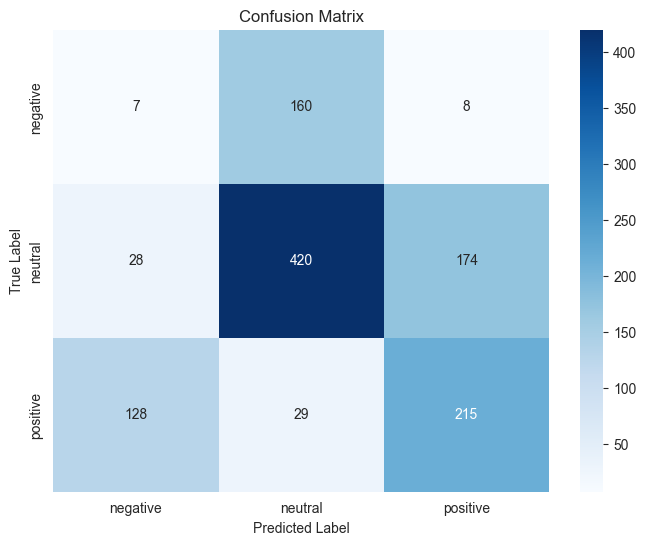

In [8]:
# Compute evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()